In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import Sequential
from keras import layers
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import adam_v2
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import random
from tqdm.notebook import tqdm
import collections
from keras.models import load_model

In [2]:
import module

In [3]:
import importlib
importlib.reload(module)

<module 'module' from 'C:\\Users\\Admin\\Documents\\Anaconda1\\08_random_aug_edge\\module.py'>

In [4]:
train_data = np.array(pd.read_pickle('D:/F/df/NoDef/X_train_NoDef.pkl')) # shape (76000, 5000), 95 website, 800 repeat
train_index = np.array(pd.read_pickle('D:/F/df/NoDef/y_train_NoDef.pkl')) # shape (76000,), 0-94 range, random

test_data = np.array(pd.read_pickle('D:/F/df/NoDef/X_test_NoDef.pkl')) # shape (9500, 5000), 95 website, 100 repeat
test_index = np.array(pd.read_pickle('D:/F/df/NoDef/y_test_NoDef.pkl')) # shape (9500,), 0-94 range, sequence

In [5]:
# RCD Insert

In [6]:
def get_data_length(data_vector):
    data_length = 5000
    for i in range(5000):
        if data_vector[i] == 0:
            data_length = i
            break
    return data_length

def add_noise(data_vector, data_length, count):
    for i in range(count):
        location = random.randint(0, data_length - 1)
        packet = random.randint(0, 1) * 2 - 1
        data_vector = np.insert(data_vector, location, packet)
        if data_length < 5000:
            data_length += 1
    
    return data_vector[0 : 5000]

In [9]:
size_extra = 0
size_sum = 0

rate = 0.6
test_data_noise = test_data.copy()
for i in range(9500):
    length = get_data_length(test_data_noise[i])
    size_sum += length
    #test_data_noise[i] = add_noise(test_data_noise[i], length, int(length * rate))
    size_extra += int(length * rate)
overhead = size_extra / size_sum
print(overhead)

0.5997985822431066


In [10]:
#overhead = [0.19979852507087928, 0.3998013265100186, 0.5997985822431066]

In [11]:
# WalkieTalkie

In [12]:
def get_data_length(data_vector):
    data_length = 5000
    for i in range(5000):
        if data_vector[i] == 0:
            data_length = i
            break
    return data_length

def walkie_talkie(data_vector, buffer_len):
    buffer = list()
    data_output = np.zeros(5000, dtype=int)
    index = 0
    for i in data_vector:
        buffer.append(i)
        if len(buffer) >= buffer_len:
            stat = collections.Counter(buffer)
            for j in range(stat[1]):
                data_output[index] = 1
                index += 1
            for j in range(stat[-1]):
                data_output[index] = -1
                index += 1
            buffer.clear()
            if stat[0] > 0:
                break
    return data_output

def add_noise(data_vector, data_length, count):
    for i in range(count):
        location = random.randint(0, data_length - 1)
        packet = data_vector[location]
        data_vector = np.insert(data_vector, location, packet)
        if data_length < 5000:
            data_length += 1
    
    return data_vector[0 : 5000]

In [15]:
size_extra = 0
size_sum = 0

rate = 0.6
test_data_noise = test_data.copy()
for i in range(9500):
    length = get_data_length(test_data_noise[i])
    size_sum += length
    #test_data_noise[i] = walkie_talkie(test_data_noise[i], 20)
    #test_data_noise[i] = add_noise(test_data_noise[i], length, int(length * rate))
    size_extra += int(length * rate)
overhead = size_extra / size_sum
print(overhead)

0.5997985822431066


In [16]:
#overhead = [0.19979852507087928, 0.3998013265100186, 0.5997985822431066]

In [17]:
# WTFPAD

In [18]:
def get_data_length(data_vector):
    data_length = 5000
    for i in range(5000):
        if data_vector[i] == 0:
            data_length = i
            break
    return data_length

def wtf_pad(data_vector, data_length, count):
    burst_location = list()
    for i in range(10):
        burst_location.append(random.randint(0, data_length-1))
        
    for i in range(count):
        location = burst_location[random.randint(0, 10-1)] + random.randint(-10, 10)
        if location < 0:
            location = 0
        elif location > 5000:
            location = 5000
        packet = random.randint(0, 1) * 2 - 1
        data_vector = np.insert(data_vector, location, packet)
    return data_vector[0 : 5000]

def add_noise(data_vector, data_length, count):
    for i in range(count):
        location = random.randint(0, data_length - 1)
        packet = random.randint(0, 1) * 2 - 1
        data_vector = np.insert(data_vector, location, packet)
        if data_length < 5000:
            data_length += 1
    
    return data_vector[0 : 5000]

In [21]:
size_extra = 0
size_sum = 0

rate = 0.6
test_data_noise = test_data.copy()
for i in range(9500):
    length = get_data_length(test_data_noise[i])
    size_sum += length
    #test_data_noise[i] = wtf_pad(test_data_noise[i], length, int(length * rate / 2))
    size_extra += int(length * rate / 2)
    #test_data_noise[i] = add_noise(test_data_noise[i], length, int(length * rate / 2))
    size_extra += int(length * rate / 2)
overhead = size_extra / size_sum
print(overhead)

0.5995547426935323


In [22]:
#overhead = [0.1995516553932563, 0.39959705014175856, 0.5995547426935323]

In [ ]:
#overhead = [0.19979852507087928, 0.3998013265100186, 0.5997985822431066]
#overhead = [0.19979852507087928, 0.3998013265100186, 0.5997985822431066]
#overhead = [0.1995516553932563, 0.39959705014175856, 0.5995547426935323]

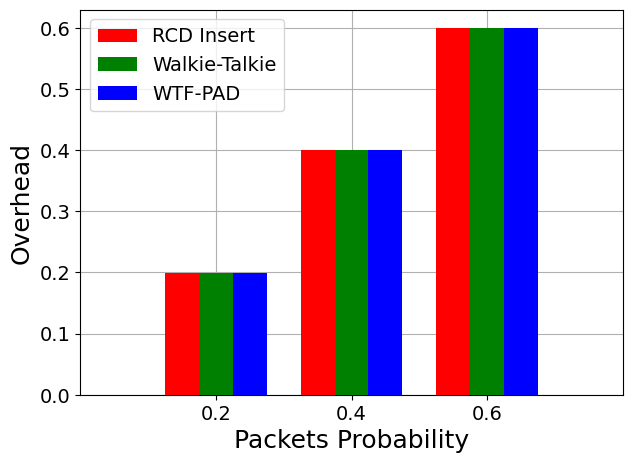

In [45]:
plt.figure(figsize=(7,5))
plt.bar(0, 0.19979852507087928, width=1, color = 'r', zorder=100) #0.2
plt.bar(1, 0.19979852507087928, width=1, color = 'g', zorder=100)
plt.bar(2, 0.1995516553932563, width=1, color = 'b', zorder=100)

plt.bar(4, 0.3998013265100186, width=1, color = 'r', zorder=100) #0.4
plt.bar(5, 0.3998013265100186, width=1, color = 'g', zorder=100)
plt.bar(6, 0.39959705014175856, width=1, color = 'b', zorder=100)

plt.bar(8, 0.5997985822431066, width=1, color = 'r', zorder=100) #0.6
plt.bar(9, 0.5997985822431066, width=1, color = 'g', zorder=100)
plt.bar(10, 0.5995547426935323, width=1, color = 'b', zorder=100)

plt.legend(['RCD Insert', 'Walkie-Talkie', 'WTF-PAD'], fontsize=14)
plt.xticks([1, 5, 9], ['0.2', '0.4', '0.6'])
plt.xlabel('Packets Probability', fontsize=18)
plt.ylabel('Overhead', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.xlim((-3, 13))
plt.savefig('C:/Users/Admin/Desktop/overhead_tor.pdf', bbox_inches = 'tight')
